In [1]:
# %load_ext autoreload
# %autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


/tmp/ipykernel_184640/3041904589.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import importlib
import numpy as np
import pickle

from pointcloud.configs import Configs
import pointcloud.utils.plotting as plotting

cfg = Configs()

print(cfg.__dict__)

/home/henry/Programs/miniconda3/envs/caloclouds/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'name': 'wish_', 'comet_project': 'wish', 'Acomment': 'test of data properties', 'log_comet': False, 'comet_workspace': 'henrydayhall', 'model_name': 'wish', 'storage_base': '/mnt/beegfs/desy/user/', 'dataset_path_in_storage': True, '_dataset_path': 'akorol/data/calo-clouds/hdf5/high_granular_grid/train/10-90GeV_x36_grid_regular_524k_float32.hdf5', 'image_dir': '/home/henry/training/point-cloud-diffusion-images', 'workers': 1, 'train_bs': 200, 'shuffle': True, 'max_points': 6000, 'lr': 1, 'device': 'cpu', '_logdir_in_storage': False, '_logdir': '/home/henry/training/point-cloud-diffusion-logs/wish', 'val_freq': 10, 'test_freq': 4, 'test_size': 4, 'log_iter': 10, 'latent_dim': 0}


In [3]:
importlib.reload(plotting)


In [4]:
title = r'\textbf{full spectrum}' #  r'\textbf{50 GeV}'
real_label = r'\textsc{Geant4}'
ddpm_label = r'\textsc{CaloClouds}'
edm_label = r'\textsc{CaloClouds II}'
cm_label = r'\textsc{CaloClouds II (CM)}'

# CoG

In [16]:
pickle_path = '/beegfs/desy/user/buhmae/6_PointCloudDiffusion/output/full/pickle/'
min_energy = 10
max_energy = 90

with open(pickle_path+'dict_{}-{}GeV.pickle'.format(str(min_energy), str(max_energy)), 'rb') as f:
    dict = pickle.load(f)

c_cog_real = dict['c_cog_real']
c_cog_fake = dict['c_cog_fake']
real_list = dict['real_list']
fakes_list = dict['fakes_list']
    
print('dicts loaded')
print(dict.keys())

dicts loaded
dict_keys(['real_list', 'fakes_list', 'c_cog_real', 'c_cog_fake'])


In [17]:
# number of cell hits above threshold
real_list[-1][real_list[-1] >= 0.1].shape

(30,)

 77%|███████▋  | 23/30 [00:00<00:00, 223.19it/s]

100%|██████████| 30/30 [00:00<00:00, 232.22it/s]


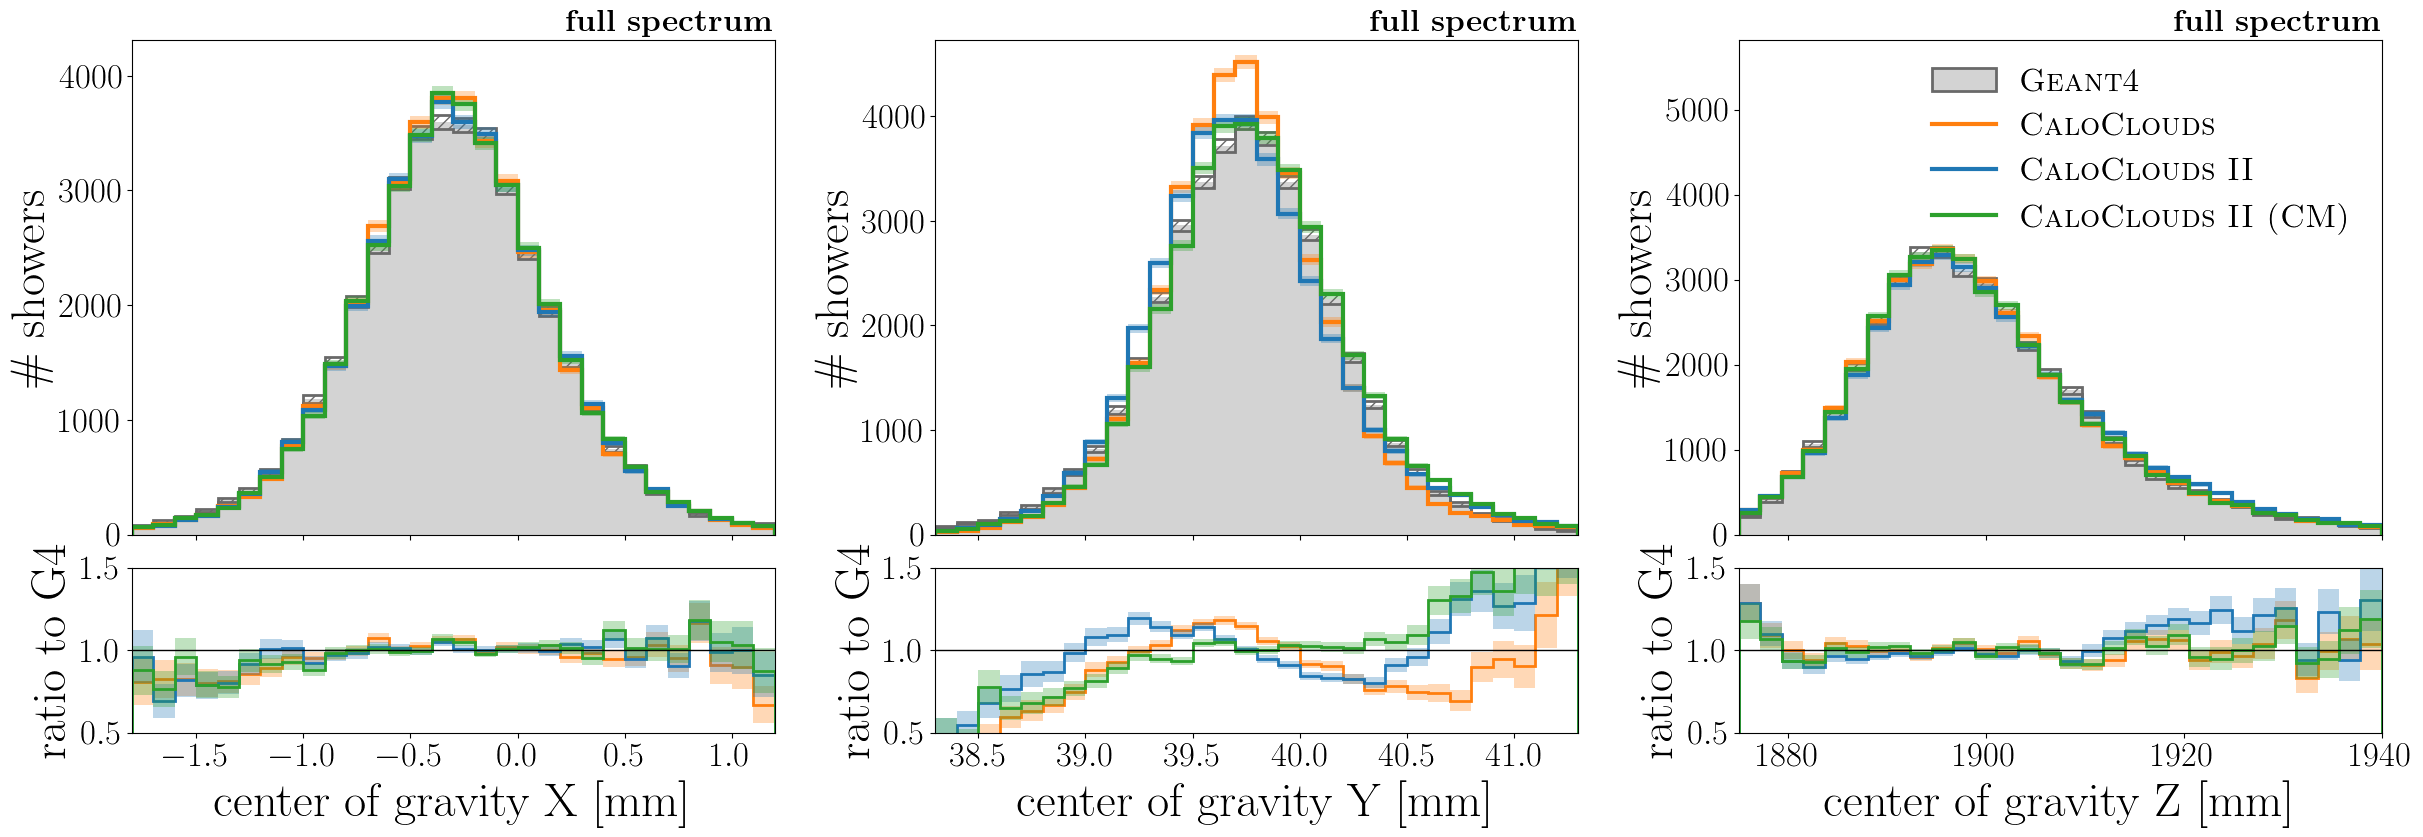

In [18]:
importlib.reload(plotting)
plotting.plt_cog(c_cog_real, c_cog_fake, [real_label, ddpm_label, edm_label, cm_label], title=title)

# other plots

In [20]:
24/3


8.0

 57%|█████▋    | 17/30 [00:00<00:00, 166.16it/s]

100%|██████████| 30/30 [00:00<00:00, 163.19it/s]


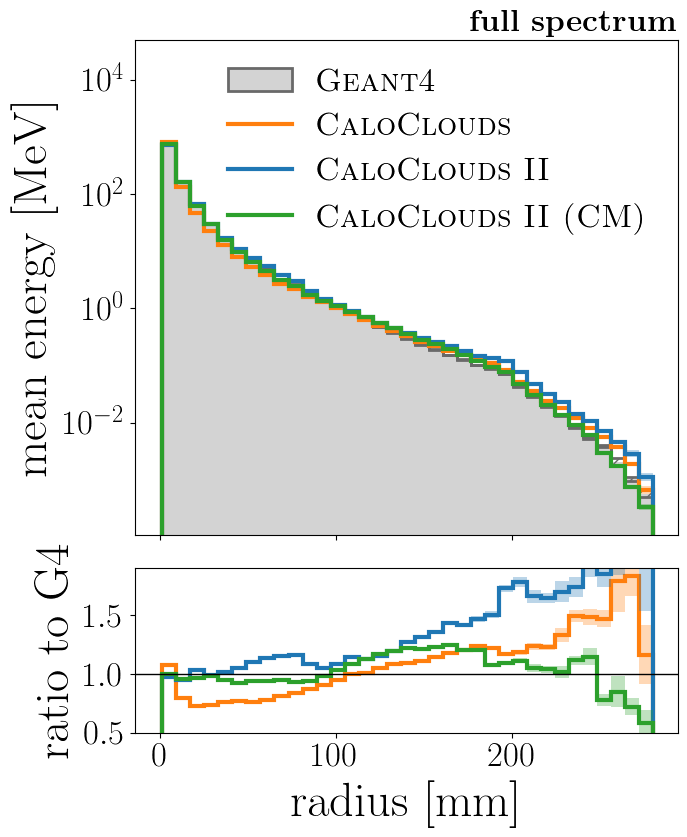

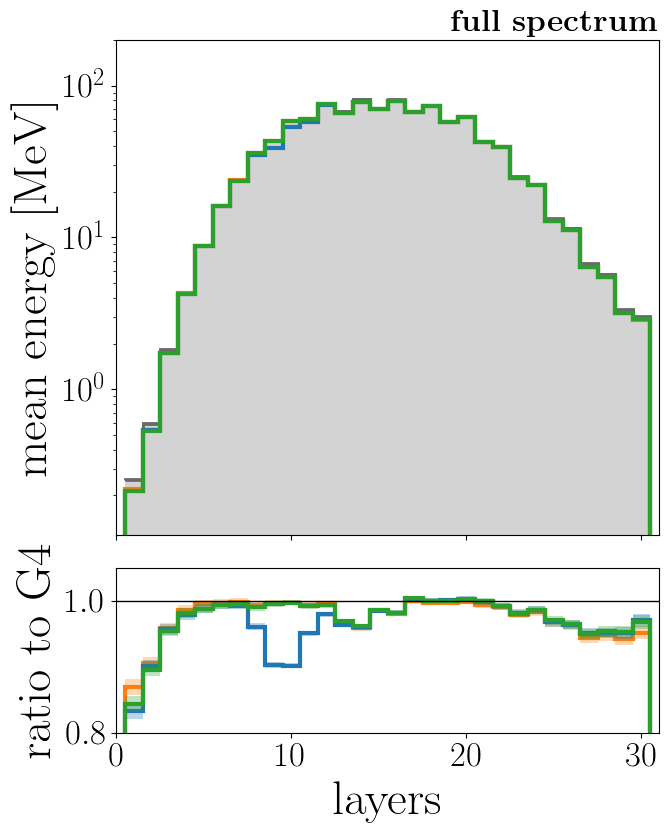

/home/buhmae/6_PointCloudDiffusion/evaluation/../utils/plotting.py:556: RuntimeWarning: invalid value encountered in divide
  lims_max = 1.9
/home/buhmae/6_PointCloudDiffusion/evaluation/../utils/plotting.py:556: RuntimeWarning: divide by zero encountered in divide
  lims_max = 1.9


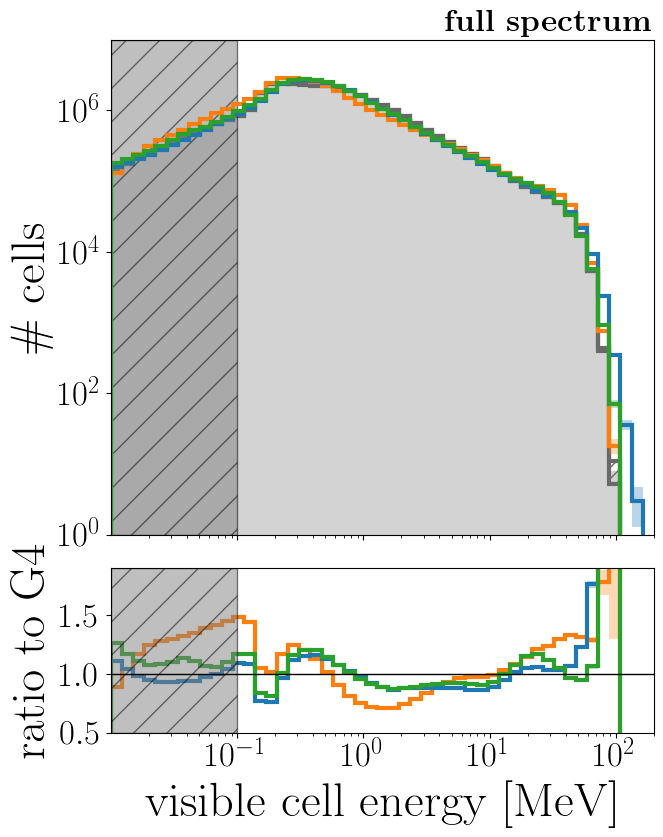

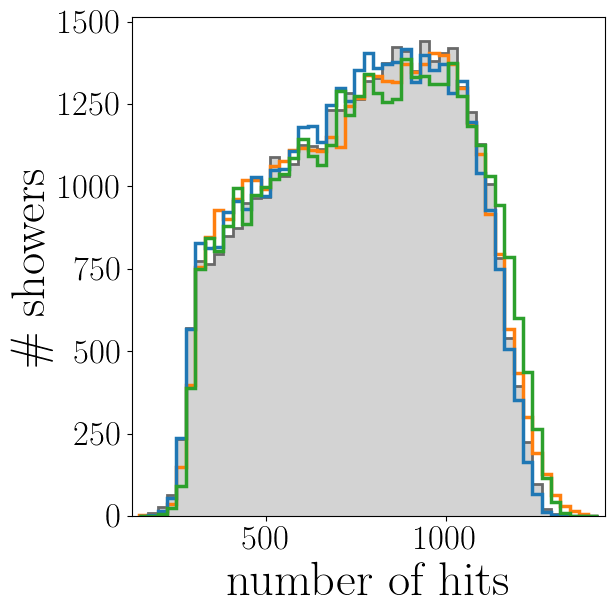

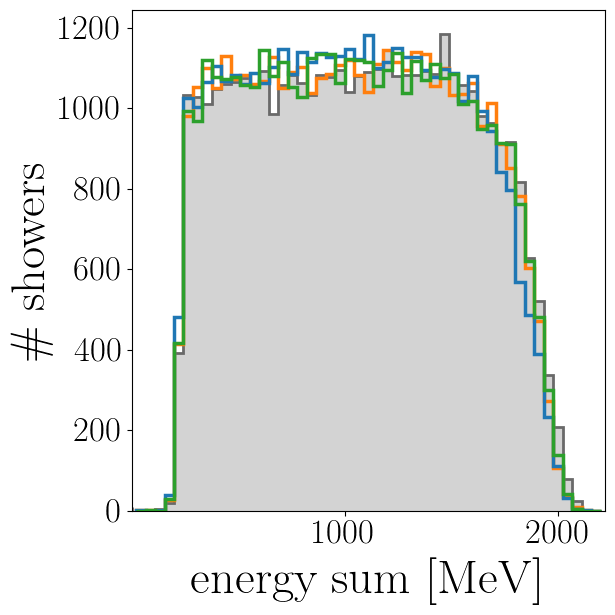

In [19]:
importlib.reload(plotting)

plotting.get_plots_from_observables(real_list, fakes_list, labels = [real_label, ddpm_label, edm_label, cm_label], title=title, events=40_000)